In [1]:
import pandas as pd 
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick 
import mplcyberpunk

# Pegar dados no yahoo finance - valor das cotas

In [2]:
dados_bancarios = yf.download(["ITUB4.SA", "BBSE3.SA", "SANB4.SA", "BBDC4.SA", "^BVSP"],
                             start = '2010-01-01', end = '2022-04-30')['Adj Close'].dropna()
#arredondar os números 
dados_bancarios

[*********************100%***********************]  5 of 5 completed


,BBDC4.SA,BBSE3.SA,ITUB4.SA,SANB4.SA,^BVSP
Date,,,,,
2013-04-29,7.880630,8.306560,9.909458,3.680481,54887.0
2013-04-30,8.142573,8.531739,10.169275,3.963594,55910.0
2013-05-02,8.127751,8.756915,10.046863,3.680481,55322.0
2013-05-03,8.109844,8.882013,10.185897,3.963594,55488.0
2013-05-06,8.035669,8.972084,10.170789,3.680481,55430.0
...,...,...,...,...,...
2022-04-25,17.972372,24.163744,24.621006,16.824757,110685.0
2022-04-26,17.200781,23.888842,23.783297,16.059992,108213.0
2022-04-27,17.304285,23.898005,23.590719,16.069551,109349.0


# Filtrar os dados para anuais e mensais - valor das cotas

In [3]:
dados_anuais = dados_bancarios.resample('Y').last()
dados_mensais = dados_bancarios.resample('M').last()

display(dados_anuais, dados_mensais)

,BBDC4.SA,BBSE3.SA,ITUB4.SA,SANB4.SA,^BVSP
Date,,,,,
2013-12-31,7.371565,12.544641,10.873570,3.767070,51507.0
2014-12-31,9.242189,17.030210,13.319171,3.419938,50007.0
2015-12-31,6.480484,13.738389,11.720749,4.474993,43350.0
2016-12-31,11.256656,16.997334,17.577328,6.660956,60227.0
2017-12-31,15.022832,18.169346,22.950912,9.431736,76402.0
2018-12-31,19.512680,19.704216,30.482176,15.564452,87887.0
2019-12-31,23.697334,28.300306,33.489502,18.724157,115964.0
2020-12-31,20.091627,25.063839,29.287605,20.039375,119306.0
2021-12-31,16.358053,18.288004,20.089855,14.650123,104822.0


,BBDC4.SA,BBSE3.SA,ITUB4.SA,SANB4.SA,^BVSP
Date,,,,,
2013-04-30,8.142573,8.531739,10.169275,3.963594,55910.0
2013-05-31,8.488140,9.242299,10.765619,3.680481,53506.0
2013-06-30,7.165250,8.806956,9.563163,3.442812,47457.0
2013-07-31,6.908527,9.227287,9.691287,4.016613,48234.0
2013-08-31,6.928532,9.851384,9.753769,3.442812,50008.0
...,...,...,...,...,...
2021-12-31,16.358053,18.288004,20.089855,14.650123,104822.0
2022-01-31,19.433804,20.394428,24.310503,16.466700,112388.0
2022-02-28,17.359919,21.112349,24.475010,15.359898,113142.0


# Calcular a rentabilidade com a função pct_change()

In [4]:
retorno_anual = dados_anuais.pct_change().dropna()
retorno_mensal = dados_mensais.pct_change().dropna()
#arredondar os dados
retorno_mensal = round((retorno_mensal *100), 4)
retorno_anual = round((retorno_anual *100), 4)


display(retorno_anual, retorno_mensal)


,BBDC4.SA,BBSE3.SA,ITUB4.SA,SANB4.SA,^BVSP
Date,,,,,
2014-12-31,25.3762,35.7569,22.4912,-9.2149,-2.9122
2015-12-31,-29.8815,-19.3293,-12.0009,30.8501,-13.3121
2016-12-31,73.7008,23.7214,49.9676,48.8484,38.9319
2017-12-31,33.4573,6.8953,30.5711,41.5973,26.8567
2018-12-31,29.8868,8.4476,32.8147,65.0221,15.0323
2019-12-31,21.4458,43.6256,9.8659,20.3008,31.9467
2020-12-31,-15.2157,-11.4362,-12.5469,7.0242,2.8819
2021-12-31,-18.5827,-27.0343,-31.4049,-26.8933,-12.1402
2022-12-31,3.4261,27.4190,14.4065,8.5143,2.9135


,BBDC4.SA,BBSE3.SA,ITUB4.SA,SANB4.SA,^BVSP
Date,,,,,
2013-05-31,4.2440,8.3284,5.8642,-7.1428,-4.2998
2013-06-30,-15.5852,-4.7103,-11.1694,-6.4576,-11.3053
2013-07-31,-3.5829,4.7727,1.3398,16.6666,1.6373
2013-08-31,0.2896,6.7636,0.6447,-14.2857,3.6779
2013-09-30,9.5191,13.3576,8.4325,26.2520,4.6593
...,...,...,...,...,...
2021-12-31,-2.2251,-0.6226,-6.3158,-10.4938,2.8524
2022-01-31,18.8027,11.5181,21.0089,12.3997,7.2180
2022-02-28,-10.6715,3.5202,0.6767,-6.7215,0.6709


#  Ler arquivo com lucro dos bancos em 2009 e 2021

In [5]:
lucro_bancos = pd.read_excel("/Users/joaopedrodiniz/Downloads/Minicurso_python_planilha_2022.xlsx", index_col = 'data')

lucro_bancos

,bradesco,banco_do_brasil,itau,santander
data,,,,
2009-12-31,8012282,10147522,10066608,1805899
2021-12-31,21945688,19710402,24988000,14987716


In [6]:
itau = dados_bancarios['ITUB4.SA']
banco_brasil = dados_bancarios['BBSE3.SA']
bradesco = dados_bancarios['BBDC4.SA']
santader = dados_bancarios['SANB4.SA']
dados_mercado = dados_bancarios['^BVSP']

In [7]:
def retorno(lista):
    retorno = lista[-1]/lista[0] - 1

    return retorno

In [8]:
retorno_itau = retorno(lista = itau)
retorno_banco_brasil = retorno(lista = banco_brasil)
retorno_bradesco = retorno(lista = bradesco)
retorno_santander = retorno(lista = santader)
retorno_mercado = retorno(lista = dados_mercado)

In [9]:
retorno_itau, retorno_banco_brasil, retorno_bradesco, retorno_santander, retorno_mercado

(1.3194102101662812,
 1.8052997115174536,
 1.1468450274247184,
 3.3194025701011167,
 0.9654198626268515)

In [10]:
df_retornos = pd.DataFrame(data = {'retornos': [retorno_itau, retorno_banco_brasil, retorno_bradesco, 
                                   retorno_santander, retorno_mercado]}, 
                            index = ["Itau", "Banco do Brasil", "Bradesco", "Santander", "Ibovespa"])


In [11]:
df_retornos['retornos'] = df_retornos['retornos'] * 100

df_retornos = df_retornos.sort_values(by = 'retornos', ascending = False)


# Retorno dos ativos em  % de 2013 até 2022

In [12]:
df_retornos 

,retornos
Santander,331.940257
Banco do Brasil,180.529971
Itau,131.941021
Bradesco,114.684503
Ibovespa,96.541986


#  Variação dos lucros dos bancos em reais 

In [13]:
variacao_lucro_bancos = lucro_bancos.iloc[-1]/lucro_bancos.iloc[0] -1

variacao_lucro_bancos = variacao_lucro_bancos * 100

variacao_lucro_bancos = variacao_lucro_bancos.sort_values(ascending = False)

variacao_lucro_bancos

santander          729.931021
bradesco           173.900594
itau               148.226612
banco_do_brasil     94.238574
dtype: float64

# Valorização de mercado dos bancos em comparação com ibovespa 

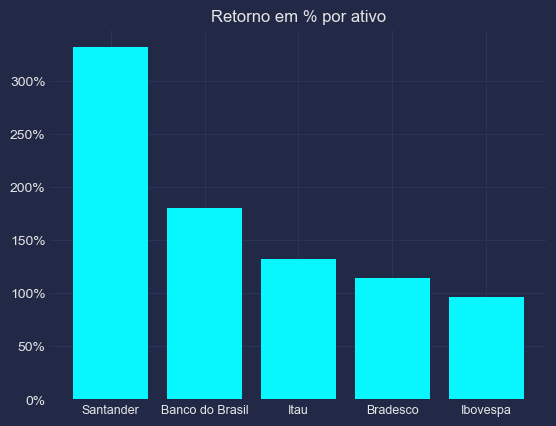

In [14]:
plt.style.use("cyberpunk")
fig, ax = plt.subplots()
ax.bar(df_retornos.index, df_retornos['retornos'])
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks(fontsize = 9)
plt.title("Retorno em % por ativo")

plt.show()

# Variação de lucro entre 2009 e 2021 em %

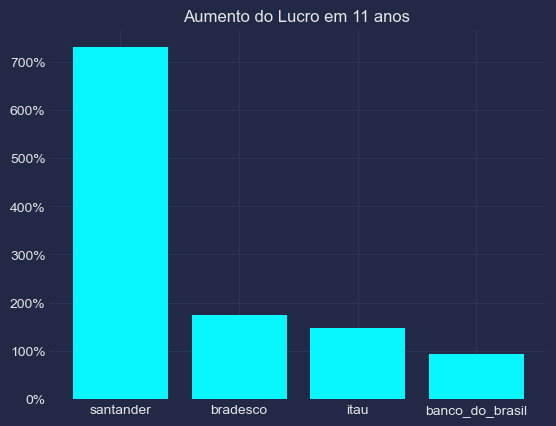

In [15]:
plt.style.use("cyberpunk")

fig, ax = plt.subplots()
ax.bar(variacao_lucro_bancos.index, variacao_lucro_bancos)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks(fontsize = 10)
plt.title("Aumento do Lucro em 11 anos ")
plt.show()